In [203]:
# Import and initialize libraries and data
#lsof -P | grep ':8888' | awk '{print $2}' | xargs kill -9

import pandas as pd
writer = pd.ExcelWriter('processed_agent_detail.xlsx')

In [204]:
df_cols = ['date','username','code','duration']
df = pd.read_csv('agent_detail.csv', header=1, usecols=[0,1,5,6], names=df_cols)

# Convert data types as needed

df['duration'] = pd.to_datetime(df.duration)


In [205]:
# Variables to compare against

short_break = pd.to_datetime('00:15:30')
long_break = pd.to_datetime('00:20:30')
unscheduled_picklist = pd.to_datetime('00:15:30')

In [206]:
# Adding the scheduled hours column

df['ten_hours_shift'] = 0 # those that have 8 hours shift
df.ten_hours_shift = df.username.map({'tstephens':1, 'gacevedonune':1})

In [207]:
# Reports

short_break_exception = df[(df.code == 'Break') & (df.duration > short_break) & (df.ten_hours_shift != 1)]
short_break_exception_export = short_break_exception.loc[:,['date','username','code','duration']]
short_break_exception_export['pretty_print'] = pd.to_datetime(short_break_exception_export.duration).dt.strftime("%H:%M:%S")
short_break_exception_export['excess'] = pd.to_datetime(short_break_exception_export.duration - short_break).dt.strftime("%H:%M:%S")
short_break_exception_export.to_excel(writer,'Short_Break')


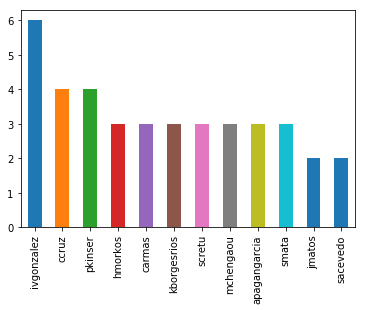

In [208]:
% matplotlib inline
short_break_exception.username.value_counts().plot(kind='bar')

In [209]:
long_break_exception = df[(df.code == 'Break') & (df.duration > long_break) & (df.ten_hours_shift == 1)]
long_break_exception.loc[:,['date','username','code','duration']].to_excel(writer,'Long_Break')

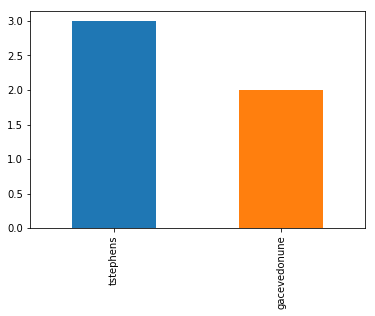

In [210]:
# Graph information
% matplotlib inline
long_break_exception.username.value_counts().plot(kind='bar')

In [211]:
unscheduled_picklist_exception = df[(df.code == 'Unscheduled Picklist') & (df.duration > unscheduled_picklist)]
unscheduled_picklist_exception.loc[:,['date','username','code','duration']].to_excel(writer,'Unscheduled_Picklist')

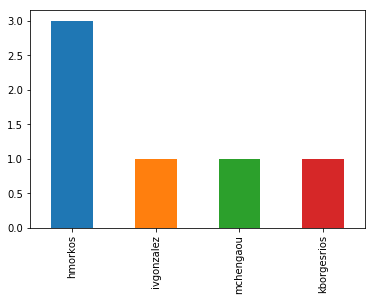

In [212]:
# Graph information
% matplotlib inline
unscheduled_picklist_exception.username.value_counts().plot(kind='bar')

In [213]:
writer.save()